# Moving Average (MA) Model

## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import acf, pacf

from statsmodels.tsa.arima.model import ARIMA

from datetime import datetime, timedelta


## Generate Synthetic Data

### Model Equation:
#### y_hat(t) = 50 + 0.4 * error (t-1) + 0.3 * error (t-2) + error(t)

error(t) ~ N(0,1)



In [2]:

errors = np.random.normal(0, 1, 400)

date_index = pd.date_range(start='9/1/2019', end='1/1/2020')


In [3]:
mu = 50

series = []

for t in range(1, len(date_index)+1):
  series.append(mu + 0.4 * errors[t-1] + 0.3*errors[t-1] + errors[t])


In [4]:
series = pd.Series(series, date_index)
series = series.asfreq(pd.infer_freq(series.index))

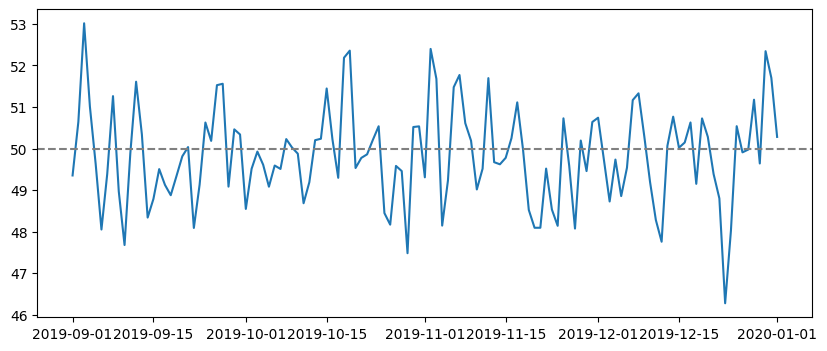

In [5]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, linestyle='--', color='grey')

## Compute Correlation

## ACF

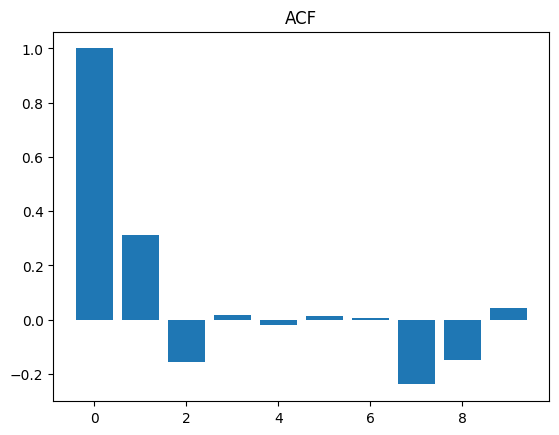

In [7]:
acf_vals = acf(series)
num_lags = 10
plt.bar(range(num_lags), acf_vals[:num_lags])
plt.title('ACF')
plt.show()

## PACF

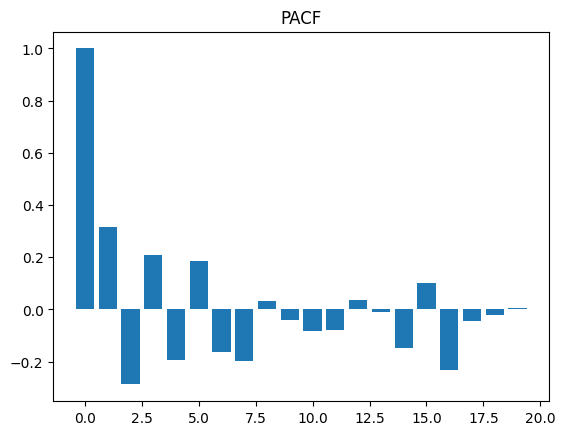

In [8]:
pacf_vals = pacf(series)
num_lags = 20
plt.bar(range(num_lags), pacf_vals[:num_lags])
plt.title('PACF')
plt.show()

## Get the Training and Test Set

In [9]:
train_end = datetime(2019, 12, 30)
test_end = datetime(2020, 1, 1)

In [11]:
train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]

## Train a MA Model

## Create and Train the model

In [12]:
# p : the order of the AR model >> AR(p)
# d : differencing - making the time series stationary >> ARIMA
# q: the order of moding average >> MA(q)
# model = ARIMA(train_data, order=(p,d,q))
model = ARIMA(train_data, order=(0, 0, 2)) # MR(2)


## Train the model

In [13]:
model_fit = model.fit()

## Summary of the Model

In [16]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  121
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -173.912
Date:                Sat, 24 Jun 2023   AIC                            355.825
Time:                        15:03:36   BIC                            367.008
Sample:                    09-01-2019   HQIC                           360.367
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.8263      0.123    406.608      0.000      49.586      50.066
ma.L1          0.5154      0.106      4.854      0.000       0.307       0.723
ma.L2         -0.2109      0.112     -1.876      0.0

## Predicted Model Equation

y_hat(t) = 50 + 0.52 * error(t-1) - 0.21 * error(t-2)




## Make Prediction

In [19]:
# The start and end index dates for prediction

pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [20]:
# prediction

predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

## Error in prediction

In [21]:
residuals = test_data - predictions

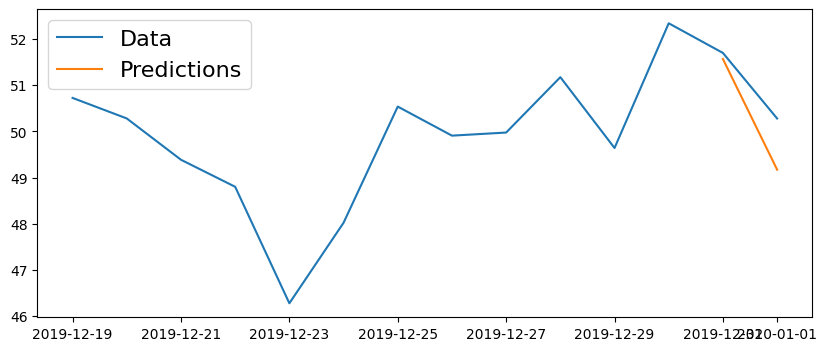

In [22]:
plt.figure(figsize=(10,4))

plt.plot(series[-14:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.show()


## Error

In [24]:
print('Mean Absolute Percent Error: ', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error:  0.0123


In [25]:
print('Root mean squared error : ', np.sqrt(np.mean(residuals**2)))

Root mean squared error :  0.7890275532850042
